In [2]:
import numpy as np
import pandas as pd

import os

import datetime, warnings
warnings.filterwarnings("ignore")

import kagglehub

In [3]:
# Download latest version
path = kagglehub.dataset_download("hrishitpatil/flight-data-2024")

print("Path to dataset files:", path)

data_path = os.path.join( path, 'flight_data_2024.csv')

Path to dataset files: C:\Users\USER\.cache\kagglehub\datasets\hrishitpatil\flight-data-2024\versions\2


In [3]:
#data_path = './flight_data_2024.csv'

In [6]:
def ver_df(path, columna_buscar):
    df = pd.read_csv(path, encoding='utf-8', sep=',')

    print(f"cantidad de muestras: {df.shape[0]}")
    print(f"cantidad de columnas: {df.shape[1]}")
    #print(f'Demo del data frame: \n{df.head(15)}')
    print(f'info del data frame: \n{df.info()}')
    print(f'descripción del data frame: \n{df.describe()}')
    print(f'columnas con valores nulos: \n{df.isna().sum()}')
    print(f'cantidad de valores del data frame: \n{df[columna_buscar].value_counts()}')
    print(f"cantidad de muestras validas: \n {df.shape[0]-df[columna_buscar].isna().sum()}")
    return df

In [4]:
df = ver_df(data_path, 'arr_delay')

cantidad de muestras: 7079081
cantidad de columnas: 35
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7079081 entries, 0 to 7079080
Data columns (total 35 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year                 int64  
 1   month                int64  
 2   day_of_month         int64  
 3   day_of_week          int64  
 4   fl_date              object 
 5   op_unique_carrier    object 
 6   op_carrier_fl_num    float64
 7   origin               object 
 8   origin_city_name     object 
 9   origin_state_nm      object 
 10  dest                 object 
 11  dest_city_name       object 
 12  dest_state_nm        object 
 13  crs_dep_time         int64  
 14  dep_time             float64
 15  dep_delay            float64
 16  taxi_out             float64
 17  wheels_off           float64
 18  wheels_on            float64
 19  taxi_in              float64
 20  crs_arr_time         int64  
 21  arr_time             float64
 22  arr_delay  

In [6]:
df.sample(10)

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,...,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
1355211,2024,3,16,6,2024-03-16,DL,2102.0,DTW,"Detroit, MI",Michigan,...,0,59.0,62.0,38.0,201.0,0,0,0,0,0
1173404,2024,3,6,3,2024-03-06,WN,2706.0,SJU,"San Juan, PR",Puerto Rico,...,0,190.0,189.0,168.0,1189.0,0,0,0,0,0
4813356,2024,9,6,5,2024-09-06,B6,1262.0,PBI,"West Palm Beach/Palm Beach, FL",Florida,...,0,168.0,160.0,142.0,1035.0,0,0,0,0,0
6350208,2024,11,23,6,2024-11-23,WN,1432.0,HOU,"Houston, TX",Texas,...,0,115.0,114.0,95.0,696.0,0,0,0,0,0
329450,2024,1,19,5,2024-01-19,OH,5299.0,CLT,"Charlotte, NC",North Carolina,...,1,58.0,NaN,NaN,75.0,0,0,0,0,0
5382763,2024,10,5,6,2024-10-05,DL,555.0,LAS,"Las Vegas, NV",Nevada,...,0,238.0,226.0,210.0,1747.0,0,0,0,0,0
789909,2024,2,14,3,2024-02-14,WN,4449.0,LAS,"Las Vegas, NV",Nevada,...,0,70.0,66.0,47.0,223.0,0,0,0,0,0
92502,2024,1,6,6,2024-01-06,AA,2097.0,ORD,"Chicago, IL",Illinois,...,0,242.0,258.0,196.0,1440.0,0,0,0,0,0
1811595,2024,4,8,1,2024-04-08,WN,2962.0,KOA,"Kona, HI",Hawaii,...,0,40.0,35.0,18.0,84.0,0,0,0,0,0
5207101,2024,9,26,4,2024-09-26,NK,263.0,ACY,"Atlantic City, NJ",New Jersey,...,0,93.0,86.0,70.0,466.0,0,0,0,0,0


#***Limpieza del data frame***

#*Limpiado NA*

In [5]:
columnas_con_nulos = ['op_carrier_fl_num', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'arr_time', 'arr_delay', 'actual_elapsed_time','actual_elapsed_time', 'air_time']

df.dropna(subset=columnas_con_nulos, inplace=True)

total_filas = len(df)

print(total_filas)

6965266


In [8]:
df.sample(5)

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,...,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
7040639,2024,12,29,7,2024-12-29,WN,4702.0,PHX,"Phoenix, AZ",Arizona,...,0,75.0,66.0,54.0,325.0,23,0,0,0,5
6109544,2024,11,11,1,2024-11-11,NK,151.0,IND,"Indianapolis, IN",Indiana,...,0,134.0,127.0,107.0,837.0,0,0,0,0,0
5416421,2024,10,7,1,2024-10-07,AA,1769.0,GEG,"Spokane, WA",Washington,...,0,152.0,150.0,130.0,1020.0,0,0,0,0,0
3090012,2024,6,12,3,2024-06-12,WN,4171.0,MCI,"Kansas City, MO",Missouri,...,0,120.0,108.0,89.0,692.0,0,0,0,0,0
1019887,2024,2,27,2,2024-02-27,MQ,3624.0,DFW,"Dallas/Fort Worth, TX",Texas,...,0,48.0,50.0,21.0,89.0,0,0,0,0,0


In [6]:
df.drop_duplicates(inplace=True)

In [10]:
columnas = df.columns
print(columnas)

Index(['year', 'month', 'day_of_month', 'day_of_week', 'fl_date',
       'op_unique_carrier', 'op_carrier_fl_num', 'origin', 'origin_city_name',
       'origin_state_nm', 'dest', 'dest_city_name', 'dest_state_nm',
       'crs_dep_time', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off',
       'wheels_on', 'taxi_in', 'crs_arr_time', 'arr_time', 'arr_delay',
       'cancelled', 'cancellation_code', 'diverted', 'crs_elapsed_time',
       'actual_elapsed_time', 'air_time', 'distance', 'carrier_delay',
       'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay'],
      dtype='object')


In [11]:
df.head(15)

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,...,diverted,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay
0,2024,1,1,1,2024-01-01,9E,4814.0,JFK,"New York, NY",New York,...,0,136.0,122.0,84.0,509.0,0,0,0,0,0
1,2024,1,1,1,2024-01-01,9E,4815.0,MSP,"Minneapolis, MN",Minnesota,...,0,130.0,114.0,88.0,622.0,0,0,0,0,0
2,2024,1,1,1,2024-01-01,9E,4817.0,JFK,"New York, NY",New York,...,0,106.0,90.0,61.0,288.0,0,0,0,0,0
3,2024,1,1,1,2024-01-01,9E,4817.0,RIC,"Richmond, VA",Virginia,...,0,111.0,76.0,51.0,288.0,0,0,0,0,0
4,2024,1,1,1,2024-01-01,9E,4818.0,DTW,"Detroit, MI",Michigan,...,0,79.0,70.0,45.0,237.0,0,0,0,0,0
5,2024,1,1,1,2024-01-01,9E,4822.0,JAX,"Jacksonville, FL",Florida,...,0,137.0,120.0,102.0,833.0,0,0,0,0,0
6,2024,1,1,1,2024-01-01,9E,4822.0,LGA,"New York, NY",New York,...,0,169.0,164.0,125.0,833.0,0,0,0,0,0
7,2024,1,1,1,2024-01-01,9E,4823.0,CHS,"Charleston, SC",South Carolina,...,0,118.0,99.0,86.0,641.0,0,0,0,0,0
8,2024,1,1,1,2024-01-01,9E,4823.0,LGA,"New York, NY",New York,...,0,149.0,123.0,101.0,641.0,0,0,0,0,0
9,2024,1,1,1,2024-01-01,9E,4828.0,ITH,"Ithaca/Cortland, NY",New York,...,0,79.0,67.0,43.0,189.0,0,0,0,0,0


# *Convertir de millas a km el campo dist*

In [7]:
df['distancia_km'] = df['distance'] * 1.60934

In [13]:
df.head(15)

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,...,crs_elapsed_time,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,distancia_km
0,2024,1,1,1,2024-01-01,9E,4814.0,JFK,"New York, NY",New York,...,136.0,122.0,84.0,509.0,0,0,0,0,0,819.15406
1,2024,1,1,1,2024-01-01,9E,4815.0,MSP,"Minneapolis, MN",Minnesota,...,130.0,114.0,88.0,622.0,0,0,0,0,0,1001.00948
2,2024,1,1,1,2024-01-01,9E,4817.0,JFK,"New York, NY",New York,...,106.0,90.0,61.0,288.0,0,0,0,0,0,463.48992
3,2024,1,1,1,2024-01-01,9E,4817.0,RIC,"Richmond, VA",Virginia,...,111.0,76.0,51.0,288.0,0,0,0,0,0,463.48992
4,2024,1,1,1,2024-01-01,9E,4818.0,DTW,"Detroit, MI",Michigan,...,79.0,70.0,45.0,237.0,0,0,0,0,0,381.41358
5,2024,1,1,1,2024-01-01,9E,4822.0,JAX,"Jacksonville, FL",Florida,...,137.0,120.0,102.0,833.0,0,0,0,0,0,1340.58022
6,2024,1,1,1,2024-01-01,9E,4822.0,LGA,"New York, NY",New York,...,169.0,164.0,125.0,833.0,0,0,0,0,0,1340.58022
7,2024,1,1,1,2024-01-01,9E,4823.0,CHS,"Charleston, SC",South Carolina,...,118.0,99.0,86.0,641.0,0,0,0,0,0,1031.58694
8,2024,1,1,1,2024-01-01,9E,4823.0,LGA,"New York, NY",New York,...,149.0,123.0,101.0,641.0,0,0,0,0,0,1031.58694
9,2024,1,1,1,2024-01-01,9E,4828.0,ITH,"Ithaca/Cortland, NY",New York,...,79.0,67.0,43.0,189.0,0,0,0,0,0,304.16526


In [14]:
aerolineas = {'9E': 'Endeavor Air', 'AA': 'American Airlines', 'AS': 'Alaska Airlines', 'B6': 'JetBlue Airways', 'DL': 'Delta Air Lines', 'F9': 'Frontier Airlines', 'G4': 'Allegiant Air', 'HA': 'Hawaiian Airlines', 'MQ': 'Envoy Air', 'NK': 'Spirit Airlines', 'OH': 'PSA Airlines', 'OO': 'SkyWest Airlines', 'UA': 'United Airlines', 'WN': 'Southwest Airlines', 'YX': 'Republic Airways'}

In [8]:
df['retraso'] = np.where(df['arr_delay']>0, 1, 0)

In [16]:
df.sample(15)

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,...,actual_elapsed_time,air_time,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,distancia_km,retraso
4261496,2024,8,9,5,2024-08-09,AA,1462.0,LAS,"Las Vegas, NV",Nevada,...,288.0,258.0,2174.0,0,0,0,0,0,3498.70516,0
1105325,2024,3,3,7,2024-03-03,AA,889.0,PHL,"Philadelphia, PA",Pennsylvania,...,224.0,178.0,1325.0,0,0,0,0,0,2132.37550,0
86148,2024,1,5,5,2024-01-05,UA,739.0,IAD,"Washington, DC",Virginia,...,167.0,134.0,921.0,0,0,0,0,0,1482.20214,0
1766533,2024,4,6,6,2024-04-06,OO,3480.0,PDX,"Portland, OR",Oregon,...,61.0,34.0,129.0,0,0,0,0,0,207.60486,0
1606752,2024,3,29,5,2024-03-29,DL,2289.0,SAN,"San Diego, CA",California,...,121.0,82.0,626.0,0,0,2,0,43,1007.44684,1
5760990,2024,10,24,4,2024-10-24,AA,273.0,DFW,"Dallas/Fort Worth, TX",Texas,...,196.0,166.0,1235.0,0,0,0,0,0,1987.53490,0
4664215,2024,8,29,4,2024-08-29,DL,461.0,DFW,"Dallas/Fort Worth, TX",Texas,...,199.0,174.0,1389.0,0,0,0,0,0,2235.37326,0
3086870,2024,6,12,3,2024-06-12,UA,435.0,CMH,"Columbus, OH",Ohio,...,112.0,76.0,463.0,0,0,0,0,0,745.12442,0
481001,2024,1,28,7,2024-01-28,B6,1032.0,LGA,"New York, NY",New York,...,87.0,44.0,184.0,0,0,0,0,0,296.11856,1
3999971,2024,7,27,6,2024-07-27,DL,2795.0,ATL,"Atlanta, GA",Georgia,...,122.0,100.0,692.0,0,0,0,0,0,1113.66328,0


In [17]:
#columnas_basura = ['cancellation_code', 'distance', 'fl_date', 'cancelled', 'arr_delay']
#columnas_basura2 = ['cancellation_code', 'distance', 'fl_date', 'cancelled', 'arr_delay', ,'dep_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']

"""nuevos_nombres_columnas = {'op_unique_carrier':'codigo_unico_aerolinea',
                              'dest':'codigo_destino',
                              'dep_time':'hora_salida',
                              'year':'año',
                              'month':'mes',
                              'day_of_month':'dia_mes',
                              'origin':'codigo_origen',
                              }
"""
#df.drop(columns=columnas_basura, inplace=True)

"nuevos_nombres_columnas = {'op_unique_carrier':'codigo_unico_aerolinea',\n                              'dest':'codigo_destino',\n                              'dep_time':'hora_salida',\n                              'year':'año',\n                              'month':'mes',\n                              'day_of_month':'dia_mes',\n                              'origin':'codigo_origen',\n                              }\n"

## **Exploración**

In [76]:
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
data = df['retraso'].groupby(df['op_unique_carrier']).value_counts()
data

op_unique_carrier  retraso
9E                 0          144070
                   1           51002
AA                 0          561389
                   1          404727
AS                 0          140780
                   1           99543
B6                 0          144132
                   1           91551
DL                 0          682270
                   1          315576
F9                 0          114601
                   1           88880
G4                 0           74877
                   1           40005
HA                 0           44286
                   1           33347
MQ                 0          173870
                   1          101447
NK                 0          159000
                   1           96633
OH                 0          141158
                   1           82515
OO                 0          485665
                   1          248221
UA                 0          490577
                   1          255241
WN         

Text(0, 0.5, 'Cantidad de vuelos')

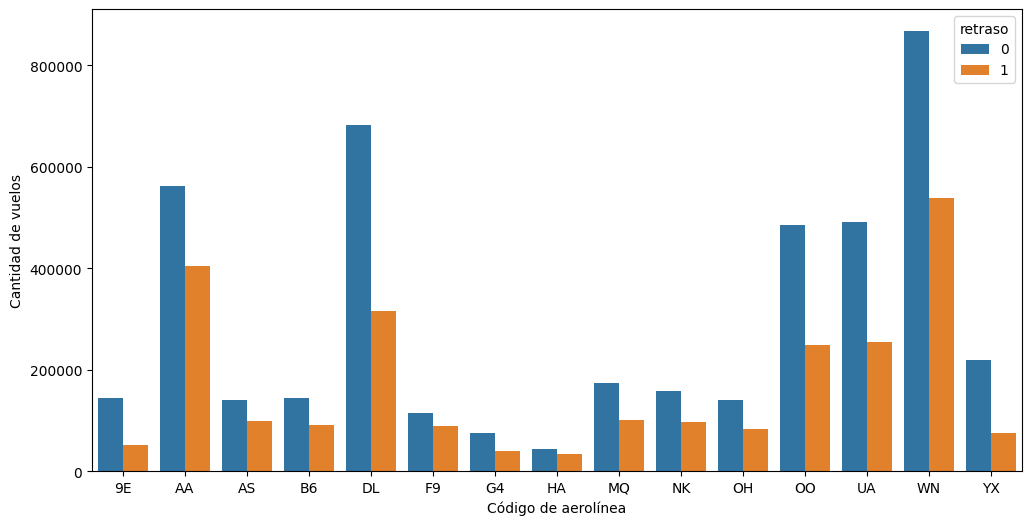

In [21]:
plt.figure(figsize=(12, 6))
sns.barplot(x=data.index.get_level_values(0), y=data.values, hue=data.index.get_level_values(1))
plt.xlabel('Código de aerolínea')
plt.ylabel('Cantidad de vuelos')

In [22]:
data = df['retraso'].groupby(df['origin']).value_counts()
data

origin  retraso
ABE     0           3178
        1           1069
ABI     0           1177
        1            564
ABQ     0          16148
                   ...  
XWA     1            611
YAK     0            512
        1            187
YUM     0           1237
        1            474
Name: count, Length: 696, dtype: int64

In [23]:
top10_origen = data.nlargest(10)
top10_origen

origin  retraso
ATL     0          214317
DEN     0          184443
DFW     0          175257
ORD     0          167553
DFW     1          131615
LAX     0          125211
ATL     1          123345
PHX     0          122364
DEN     1          119880
CLT     0          119484
Name: count, dtype: int64

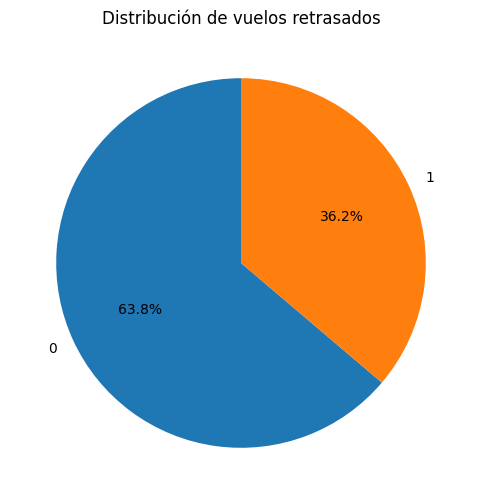

In [24]:
data = df['retraso'].value_counts()
plt.figure(figsize=(10, 6))
plt.pie(data, labels=data.index, autopct='%1.1f%%', startangle=90)
plt.title('Distribución de vuelos retrasados')
plt.show()

Text(0, 0.5, 'Cantidad de vuelos')

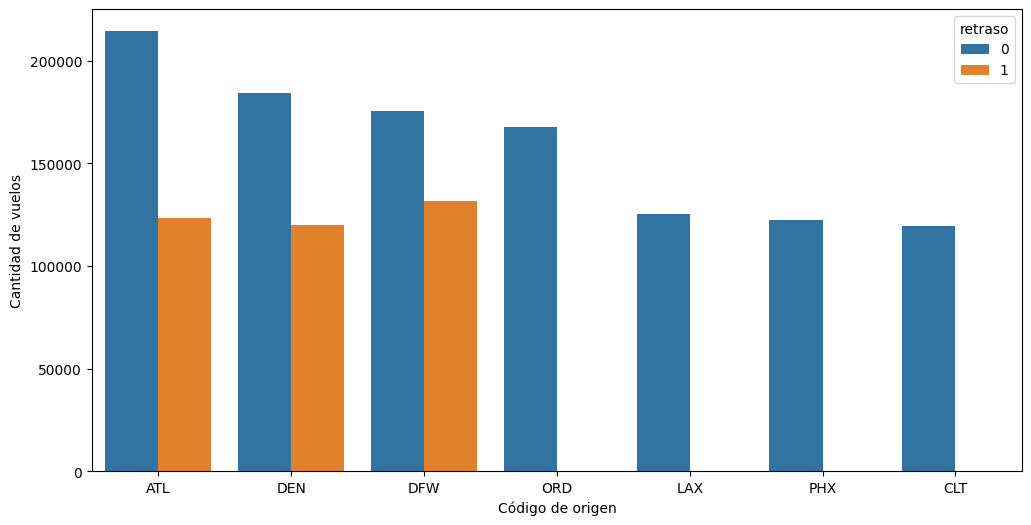

In [ ]:
plt.figure(figsize=(12, 6))
sns.barplot(x=top10_origen.index.get_level_values(0), y=top10_origen.values, hue=top10_origen.index.get_level_values(1))
plt.xlabel('Código de origen top 10')
plt.ylabel('Cantidad de vuelos')

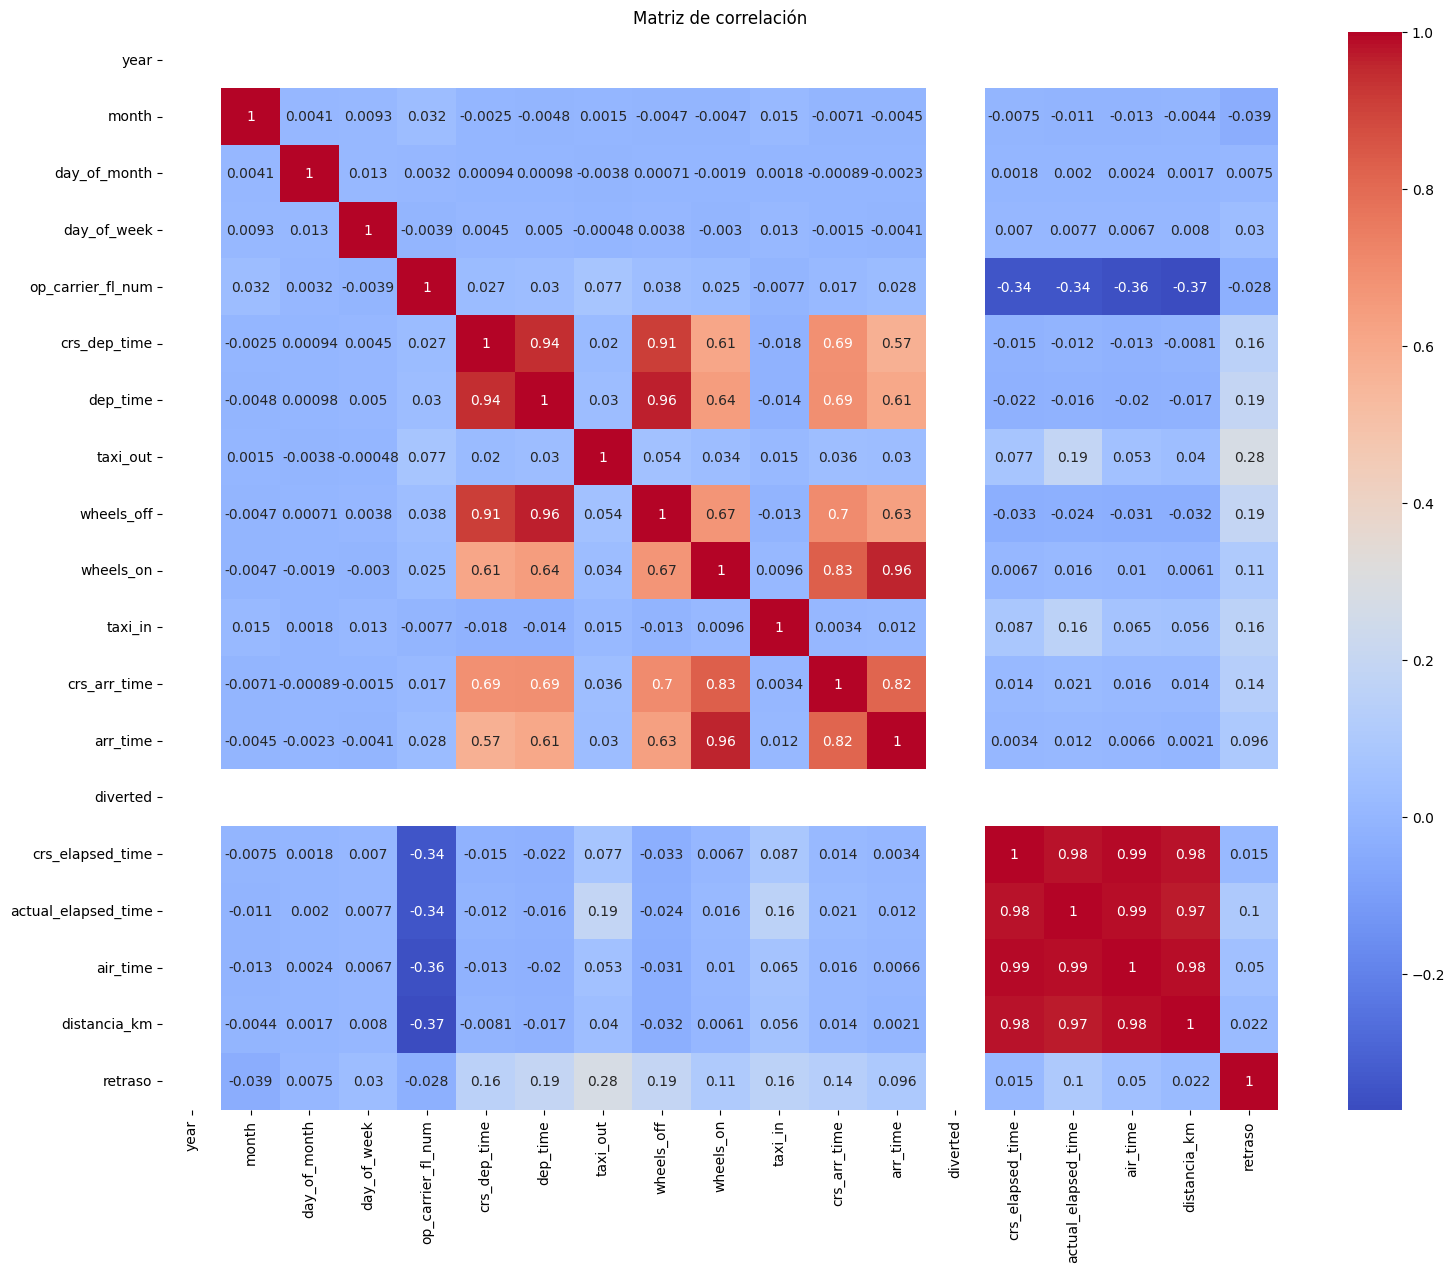

In [27]:
corr_matrix = df.corr(numeric_only=True)
plt.figure(figsize=(18, 14))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de correlación')
plt.show()

# **Preproceso**

## **Colunmas a eliminar**

In [20]:
columnas_basura = ['cancellation_code', 'distance', 'fl_date', 'cancelled', 'arr_delay','dep_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay']
df_backup = df.copy()
df.drop(columns=columnas_basura, inplace=True)

### **Se aisla la variable objetivo**

In [9]:
y = df['retraso']
X = df.drop(['retraso'], axis=1)

In [10]:
from sklearn.compose import make_column_selector as selector

In [11]:
cat_selector = selector(dtype_include=['object', 'category'])
variables_categoricas = cat_selector(df)

In [30]:
print(variables_categoricas)

['op_unique_carrier', 'origin', 'origin_city_name', 'origin_state_nm', 'dest', 'dest_city_name', 'dest_state_nm']


In [22]:
from sklearn.compose import make_column_transformer
from sklearn.preprocessing import OneHotEncoder

## **Configuración del del encoder para las variables categóricas**

In [23]:
one_hot = make_column_transformer(
    (OneHotEncoder(
        drop="if_binary", 
        handle_unknown="ignore", 
        sparse_output=True  
    ), variables_categoricas),
    remainder="passthrough",
    sparse_threshold=1.0     
)

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score,confusion_matrix, ConfusionMatrixDisplay, r2_score

In [79]:
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer, f1_score, roc_auc_score, precision_score, recall_score

In [80]:
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.preprocessing import OrdinalEncoder, TargetEncoder, StandardScaler

In [83]:
from sklearn.linear_model import LogisticRegression
from sklearn.compose import ColumnTransformer

In [14]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200)

In [ ]:
"""
model_bosque = Pipeline(steps=[
    ("preprocessor", one_hot),
    ("classifier", RandomForestClassifier(random_state=200, class_weight="balanced", max_depth=5, n_jobs=-1) )
])
"""

In [ ]:
#model_bosque.fit(X_train, y_train)

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('onehotencoder', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transfo

## **Selección automatizada de los mejores parámetros**

In [ ]:
"""
# Parámetros para probar en el modelo RandomForest
param_dist = {
    "classifier__n_estimators": [100, 200, 300],  
    "classifier__max_depth": [None, 5, 10, 15],  
    "classifier__min_samples_split": [3, 5, 10],  
    "classifier__min_samples_leaf": [1, 2, 4],    
    "classifier__max_features": ['sqrt', 'log2', None],
    "classifier__class_weight": ['balanced', 'balanced_subsample', None] 
}

# Definición de múltiples métricas de evaluación
scoring = {
    'f1_macro': make_scorer(f1_score, average='macro'),    
    'precision_macro': make_scorer(precision_score, average='macro'),
    'recall_macro': make_scorer(recall_score, average='macro'),
    'roc_auc': make_scorer(roc_auc_score, needs_proba=True)
}

"""
search = GridSearchCV(
    model_bosque,  
    param_grid=param_dist,
    scoring=scoring,  
    refit='f1_macro',  
    cv=3,
    verbose=2,
    n_jobs=1,
    return_train_score=True  
)
"""

search = RandomizedSearchCV(
    model_bosque,  
    param_distributions=param_dist,
    n_iter=10,
    scoring=scoring,  
    refit='f1_macro',  
    cv=3,
    verbose=2,
    random_state=42,
    n_jobs=1,
    return_train_score=True  
)
"""

In [39]:
#Se comenta el código de búsqueda de parámetros óptimos, por temas de tiempo de ejecución
"""
search.fit(X_train, y_train)

print("Mejor score (f1_macro):", search.best_score_)
print("Mejores params:", search.best_params_)
"""


'\nsearch.fit(X_train, y_train)\n\nprint("Mejor score (f1_macro):", search.best_score_)\nprint("Mejores params:", search.best_params_)\n'

In [40]:
"""
results = pd.DataFrame(search.cv_results_)
print(results[['param_classifier__n_estimators', 'mean_test_f1_macro', 'mean_test_roc_auc']].sort_values('mean_test_f1_macro', ascending=False))
"""

"\nresults = pd.DataFrame(search.cv_results_)\nprint(results[['param_classifier__n_estimators', 'mean_test_f1_macro', 'mean_test_roc_auc']].sort_values('mean_test_f1_macro', ascending=False))\n"

# Metricas del modelo sin ajustar

In [ ]:
"""
y_pred = model_bosque.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(f'predicción antes de las mejoras:\n {classification_report(y_test, y_pred)}')
"""

Accuracy: 0.6072255634024237
predicción antes de las mejoras:               precision    recall  f1-score   support

           0       0.74      0.58      0.66    889169
           1       0.47      0.65      0.54    503885

    accuracy                           0.61   1393054
   macro avg       0.61      0.62      0.60   1393054
weighted avg       0.65      0.61      0.61   1393054



Accuracy: 0.6072255634024237
predicción antes de las mejoras:               
                precision    recall  f1-score   support

           0       0.74      0.58      0.66    889169
           1       0.47      0.65      0.54    503885

    accuracy                           0.61   1393054
   macro avg       0.61      0.62      0.60   1393054
weighted avg       0.65      0.61      0.61   1393054

[[520089 369080]
 [178076 325809]]


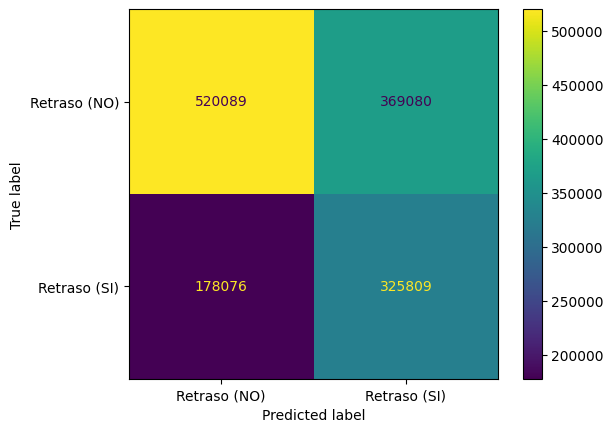

In [ ]:
"""
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
visualizacion = ConfusionMatrixDisplay(matrix, display_labels=['Retraso (NO)', 'Retraso (SI)'])
visualizacion.plot()
"""

# **Metricas del Modelo ajustado de manera manual**

In [ ]:
# Construcción del pipeline con paramertros elegidos al azar
# se comenta el código por temas de tiempo de ejecución
"""
modelo_bosque_optimizado_azar = Pipeline(steps=[
    ("preprocessor", one_hot),  
    ("classifier", RandomForestClassifier(
        random_state=200,
        n_estimators=200,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt',
        class_weight='balanced',
        n_jobs=-1
    ))
])

modelo_bosque_optimizado_azar.fit(X_train, y_train)
"""

,"steps steps: list of tuplesList of (name of step, estimator) tuples that are to be chained insequential order. To be compatible with the scikit-learn API, all stepsmust define `fit`. All non-last steps must also define `transform`. See:ref:`Combining Estimators ` for more details.","[('preprocessor', ...), ('classifier', ...)]"
,"transform_input transform_input: list of str, default=NoneThe names of the :term:`metadata` parameters that should be transformed by thepipeline before passing it to the step consuming it.This enables transforming some input arguments to ``fit`` (other than ``X``)to be transformed by the steps of the pipeline up to the step which requiresthem. Requirement is defined via :ref:`metadata routing `.For instance, this can be used to pass a validation set through the pipeline.You can only set this if metadata routing is enabled, which youcan enable using ``sklearn.set_config(enable_metadata_routing=True)``... versionadded:: 1.6",None
,"memory memory: str or object with the joblib.Memory interface, default=NoneUsed to cache the fitted transformers of the pipeline. The last stepwill never be cached, even if it is a transformer. By default, nocaching is performed. If a string is given, it is the path to thecaching directory. Enabling caching triggers a clone of the transformersbefore fitting. Therefore, the transformer instance given to thepipeline cannot be inspected directly. Use the attribute ``named_steps``or ``steps`` to inspect estimators within the pipeline. Caching thetransformers is advantageous when fitting is time consuming. See:ref:`sphx_glr_auto_examples_neighbors_plot_caching_nearest_neighbors.py`for an example on how to enable caching.",None
,"verbose verbose: bool, default=FalseIf True, the time elapsed while fitting each step will be printed as itis completed.",False
,"transformers transformers: list of tuplesList of (name, transformer, columns) tuples specifying thetransformer objects to be applied to subsets of the data.name : str Like in Pipeline and FeatureUnion, this allows the transformer and its parameters to be set using ``set_params`` and searched in grid search.transformer : {'drop', 'passthrough'} or estimator Estimator must support :term:`fit` and :term:`transform`. Special-cased strings 'drop' and 'passthrough' are accepted as well, to indicate to drop the columns or to pass them through untransformed, respectively.columns : str, array-like of str, int, array-like of int, array-like of bool, slice or callable Indexes the data on its second axis. Integers are interpreted as positional columns, while strings can reference DataFrame columns by name. A scalar string or int should be used where ``transformer`` expects X to be a 1d array-like (vector), otherwise a 2d array will be passed to the transformer. A callable is passed the input data `X` and can return any of the above. To select multiple columns by name or dtype, you can use :obj:`make_column_selector`.","[('onehotencoder', ...)]"
,"remainder remainder: {'drop', 'passthrough'} or estimator, default='drop'By default, only the specified columns in `transformers` aretransformed and combined in the output, and the non-specifiedcolumns are dropped. (default of ``'drop'``).By specifying ``remainder='passthrough'``, all remaining columns thatwere not specified in `transformers`, but present in the data passedto `fit` will be automatically passed through. This subset of columnsis concatenated with the output of the transformers. For dataframes,extra columns not seen during `fit` will be excluded from the outputof `transform`.By setting ``remainder`` to be an estimator, the remainingnon-specified columns will use the ``remainder`` estimator. Theestimator must support :term:`fit` and :term:`transform`.Note that using this feature requires that the DataFrame columnsinput at :term:`fit` and :term:`transform` have identical order.",'passthrough'
,"sparse_threshold sparse_threshold: float, default=0.3If the output of the different transfo

In [ ]:
"""y_pred = modelo_bosque_optimizado_azar.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(f'predicción con mejoras:\n{classification_report(y_test, y_pred)}')"""

Accuracy: 0.6548195547337002
predicción antes de las mejoras:               precision    recall  f1-score   support

           0       0.78      0.63      0.70    889169
           1       0.52      0.69      0.59    503885

    accuracy                           0.65   1393054
   macro avg       0.65      0.66      0.65   1393054
weighted avg       0.69      0.65      0.66   1393054



Accuracy: 0.6548195547337002
predicción con las mejoras:               
                precision    recall  f1-score   support

           0       0.78      0.63      0.70    889169
           1       0.52      0.69      0.59    503885

    accuracy                           0.65   1393054
   macro avg       0.65      0.66      0.65   1393054
weighted avg       0.69      0.65      0.66   1393054

# **Metricas del Modelo ajustado usando Gridsearch o randomnized**

In [45]:
"aquí se implementara la predicción con el modelo optimizado mediante el grid search"

'aquí se implementara la predicción con el modelo optimizado mediante el grid search'

### probando histGradient

In [ ]:
Preprocessor_hist = make_column_transformer(
    (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), variables_categoricas),
    remainder='passthrough'
)

modelo_hist = Pipeline(steps=[
    ('preprocessor', Preprocessor_hist),
    ('classifier', HistGradientBoostingClassifier(
        random_state=200,
        class_weight='balanced',
        max_iter=200
         
    ))
])

modelo_hist.fit(X_train, y_train)

y_pred = modelo_hist.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(f'predicción antes de las mejoras:\n {classification_report(y_test, y_pred)}')

Accuracy: 0.9578078093167961
predicción antes de las mejoras:
               precision    recall  f1-score   support

           0       0.97      0.96      0.97    889169
           1       0.94      0.95      0.94    503885

    accuracy                           0.96   1393054
   macro avg       0.95      0.96      0.95   1393054
weighted avg       0.96      0.96      0.96   1393054



## revisando el modelo histgradient

In [73]:
from sklearn.inspection import permutation_importance


result = permutation_importance(modelo_hist, X_test.head(10000), y_test.head(10000), n_repeats=5, random_state=200)

for i in result.importances_mean.argsort()[::-1]:
    print(f"{X_test.columns[i]}: {result.importances_mean[i]:.3f}")

dep_time: 0.359
crs_dep_time: 0.322
crs_arr_time: 0.283
arr_time: 0.256
crs_elapsed_time: 0.242
actual_elapsed_time: 0.194
wheels_on: 0.081
taxi_out: 0.024
air_time: 0.021
taxi_in: 0.014
wheels_off: 0.005
op_unique_carrier: 0.000
distancia_km: 0.000
dest_state_nm: 0.000
dest: 0.000
diverted: 0.000
year: 0.000
dest_city_name: -0.000
origin_state_nm: -0.000
day_of_week: -0.000
day_of_month: -0.000
month: -0.000
origin: -0.000
origin_city_name: -0.001
op_carrier_fl_num: -0.001


In [ ]:
variables_reales = [
    'crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 
    'distancia_km', 'op_unique_carrier', 'dest', 'origin', 
    'day_of_week', 'month', 'day_of_month'
]

variables_numericas_reales = ['crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'distancia_km']
variables_categoricas_reales = ['op_unique_carrier', 'dest', 'origin', 'day_of_week', 'month', 'day_of_month']

scaler = StandardScaler(with_mean=False)

Preprocessor_limpio = make_column_transformer(
    (scaler, variables_numericas_reales),
    (OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1), variables_categoricas_reales),
    remainder='drop' 
)


modelo_hist_final = Pipeline(steps=[
    ('preprocessor', Preprocessor_limpio),
    ('classifier', HistGradientBoostingClassifier(
        class_weight='balanced',
        random_state=200,
        max_iter=100
    ))
])

   

modelo_hist_final.fit(X_train, y_train)

y_pred = modelo_hist_final.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(f'predicción con los valores reales:\n {classification_report(y_test, y_pred)}')


Accuracy: 0.6354642390029389
predicción con los valores reales:
               precision    recall  f1-score   support

           0       0.74      0.65      0.70    889169
           1       0.50      0.60      0.54    503885

    accuracy                           0.64   1393054
   macro avg       0.62      0.63      0.62   1393054
weighted avg       0.65      0.64      0.64   1393054



Accuracy: 0.6354642390029389
predicción con los valores reales:
               precision    recall  f1-score   support

           0       0.74      0.65      0.70    889169
           1       0.50      0.60      0.54    503885

    accuracy                           0.64   1393054
   macro avg       0.62      0.63      0.62   1393054
weighted avg       0.65      0.64      0.64   1393054

### **Con target**

In [ ]:
variables_reales = [
    'crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 
    'distancia_km', 'op_unique_carrier', 'dest', 'origin', 
    'day_of_week', 'month', 'day_of_month'
]

variables_numericas_reales = ['crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'distancia_km']
variables_categoricas_reales = ['op_unique_carrier', 'dest', 'origin', 'day_of_week', 'month', 'day_of_month']

scaler = StandardScaler(with_mean=False)

Preprocessor_target = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variables_numericas_reales),
        ('cat', TargetEncoder(target_type='binary', random_state=200), variables_categoricas_reales)
    ],
    remainder='drop'
)

modelo_hist_target = Pipeline(steps=[
    ('preprocessor', Preprocessor_target),
    ('classifier', HistGradientBoostingClassifier(
        class_weight='balanced',
        random_state=200,
        learning_rate=0.05,
        max_iter=200
    ))
])

modelo_hist_target.fit(X_train, y_train)

y_pred = modelo_hist_target.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(f'predicción con los valores reales:\n {classification_report(y_test, y_pred)}')


Accuracy: 0.6312303758504696
predicción con los valores reales:
               precision    recall  f1-score   support

           0       0.74      0.65      0.69    889169
           1       0.49      0.60      0.54    503885

    accuracy                           0.63   1393054
   macro avg       0.62      0.62      0.62   1393054
weighted avg       0.65      0.63      0.64   1393054



Accuracy: 0.6312303758504696
predicción con los valores reales:
               precision    recall  f1-score   support

           0       0.74      0.65      0.69    889169
           1       0.49      0.60      0.54    503885

    accuracy                           0.63   1393054
   macro avg       0.62      0.62      0.62   1393054
weighted avg       0.65      0.63      0.64   1393054

## **Resample del modelo random forest**

In [ ]:
"""
from imblearn.under_sampling import NearMiss
from imblearn.pipeline import Pipeline as ImbPipeline

modelo_bosque_rasample = ImbPipeline(steps=[
    ("preprocessor", one_hot),
    ("undersample", NearMiss(version=1)),
    ("classifier", RandomForestClassifier(
        random_state=200, 
        n_estimators=100, 
        max_depth=12,
        min_samples_split=5,
        min_samples_leaf=2,
        n_jobs=-1,
        class_weight='balanced'
    ))
])
"""

In [16]:
#modelo_bosque_rasample.fit(X_train, y_train)

In [ ]:
"""
y_pred = modelo_bosque_optimizado_azar.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print(f'predicción con resample:\n{classification_report(y_test, y_pred)}')
"""

## **Modelo logistic regression**

In [ ]:
scaler = StandardScaler(with_mean=False)

variables_numericas = selector(dtype_include=['int64', 'float64'])
variables_categoricas = selector(dtype_include=['object', 'category'])

Preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, variables_numericas), 
        ('cat', OneHotEncoder(
            drop="if_binary", 
            handle_unknown="ignore", 
            sparse_output=True  
        ), variables_categoricas)  
    ],
    remainder='passthrough',
    sparse_threshold=1.0  
)

modelo_logistico = Pipeline(steps=[
    ('preprocessor', Preprocessor), 
    ('classifier', LogisticRegression(
        random_state=200,
        class_weight='balanced',
        solver='saga',      # SAGA es eficiente para datasets grandes
        max_iter=100,       # Empieza con 100; si no converge, súbelo a 500
        n_jobs=-1,          # Paraleliza si es posible
        warm_start=True     # Útil si quieres re-entrenar luego
    ))
])

print("columnas de entrada:", X_train.columns)

modelo_logistico.fit(X_train, y_train)

y_pred = modelo_logistico.predict(X_test)



print("Accuracy:", accuracy_score(y_test, y_pred))

print(f'predicción antes de las mejoras:\n {classification_report(y_test, y_pred)}')

ValueError: scipy.sparse does not support dtype object. The only supported types are: bool, int8, uint8, int16, uint16, intc, uintc, int32, uint32, int64, uint64, float32, float64, longdouble, complex64, complex128, clongdouble.

Accuracy: 0.7382843737572269
predicción antes de las mejoras:
               precision    recall  f1-score   support

           0       0.81      0.77      0.79    889169
           1       0.63      0.69      0.65    503885

    accuracy                           0.74   1393054
   macro avg       0.72      0.73      0.72   1393054
weighted avg       0.74      0.74      0.74   1393054

### **usando la probabilidad**

In [68]:
y_probs = modelo_logistico.predict_proba(X_test)[:, 1]
y_pred_ajustado = (y_probs > 0.6).astype(int) 


print(classification_report(y_test, y_pred_ajustado))

              precision    recall  f1-score   support

           0       0.77      0.89      0.83    889169
           1       0.74      0.54      0.62    503885

    accuracy                           0.76   1393054
   macro avg       0.76      0.71      0.72   1393054
weighted avg       0.76      0.76      0.75   1393054



### Prueba creando otras columnas

In [31]:
def crear_nuevos_campos(df):
    df['dep_hour'] = (df['dep_time']//100).astype(int)
    bins = [0, 6, 12, 18, 24]
    labels = ['Madrugada', 'Mañana', 'Tarde', 'Noche']
    df['bloque_horario'] = pd.cut(df['dep_hour'], bins=bins, labels=labels, include_lowest=True)
    df['is_weekend'] = df['day_of_week'].isin([6, 7]).astype(int)
    return df

X_train = crear_nuevos_campos(X_train)
X_test = crear_nuevos_campos(X_test)

X_test.sample(10)

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,...,distance,carrier_delay,weather_delay,nas_delay,security_delay,late_aircraft_delay,distancia_km,dep_hour,bloque_horario,is_weekend
5792874,2024,10,25,5,2024-10-25,OO,4833.0,DFW,"Dallas/Fort Worth, TX",Texas,...,351.0,0,0,0,0,0,564.87834,17,Tarde,0
5304000,2024,10,1,2,2024-10-01,DL,3126.0,IND,"Indianapolis, IN",Indiana,...,432.0,0,0,0,0,0,695.23488,18,Tarde,0
3190583,2024,6,17,1,2024-06-17,WN,1168.0,OAK,"Oakland, CA",California,...,1468.0,5,0,0,0,61,2362.51112,19,Noche,0
5570347,2024,10,14,1,2024-10-14,OO,5530.0,ORD,"Chicago, IL",Illinois,...,240.0,9,0,44,0,0,386.24160,21,Noche,0
4813002,2024,9,6,5,2024-09-06,AS,509.0,ANC,"Anchorage, AK",Alaska,...,2018.0,0,0,0,0,0,3247.64812,16,Tarde,0
3731831,2024,7,14,7,2024-07-14,MQ,3385.0,DFW,"Dallas/Fort Worth, TX",Texas,...,312.0,0,0,0,0,0,502.11408,14,Tarde,1
5556795,2024,10,14,1,2024-10-14,9E,4804.0,GSP,"Greer, SC",South Carolina,...,610.0,0,0,0,0,0,981.69740,12,Mañana,0
3319754,2024,6,24,1,2024-06-24,AA,1885.0,PIT,"Pittsburgh, PA",Pennsylvania,...,1814.0,0,0,0,0,0,2919.34276,7,Mañana,0
2806504,2024,5,29,3,2024-05-29,WN,4649.0,HOU,"Houston, TX",Texas,...,687.0,0,0,0,0,0,1105.61658,5,Madrugada,0
1900307,2024,4,13,6,2024-04-13,HA,198.0,HNL,"Honolulu, HI",Hawaii,...,163.0,0,0,0,0,0,262.32242,8,Mañana,1


### modelo hist

In [49]:
variables_numericas_reales = ['crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'distancia_km', 'is_weekend']
variables_categoricas_reales = ['op_unique_carrier', 'dest', 'origin', 'day_of_week', 'month', 'day_of_month', 'bloque_horario']

scaler = StandardScaler(with_mean=False)

Preprocessor_target = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variables_numericas_reales),
        ('cat', TargetEncoder(target_type='binary', random_state=200), variables_categoricas_reales)
    ],
    remainder='drop'
)

modelo_hist_target = Pipeline(steps=[
    ('preprocessor', Preprocessor_target),
    ('classifier', HistGradientBoostingClassifier(
        class_weight='balanced',
        random_state=200,
        learning_rate=0.03,
        max_iter=500,
        l2_regularization=1.5
    ))
])


modelo_hist_target.fit(X_train, y_train)

y_pred = modelo_hist_target.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(f'predicción con los valores reales:\n {classification_report(y_test, y_pred)}')


Accuracy: 0.6686373966838328
predicción con los valores reales:
               precision    recall  f1-score   support

           0       0.76      0.71      0.73    889169
           1       0.54      0.60      0.57    503885

    accuracy                           0.67   1393054
   macro avg       0.65      0.65      0.65   1393054
weighted avg       0.68      0.67      0.67   1393054



Accuracy: 0.6686373966838328
predicción con los valores reales:
               precision    recall  f1-score   support

           0       0.76      0.71      0.73    889169
           1       0.54      0.60      0.57    503885

    accuracy                           0.67   1393054
   macro avg       0.65      0.65      0.65   1393054
weighted avg       0.68      0.67      0.67   1393054

[[629936 259233]
 [202373 301512]]


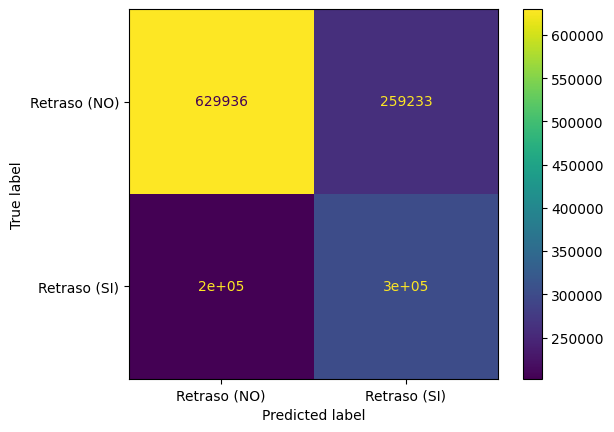

In [ ]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
visualizacion = ConfusionMatrixDisplay(matrix, display_labels=['Retraso (NO)', 'Retraso (SI)'])
visualizacion.plot()

# Extra integración variables climatologícas

In [91]:
df_vuelos = ver_df(data_path, 'arr_delay')

cantidad de muestras: 7079081
cantidad de columnas: 35
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7079081 entries, 0 to 7079080
Data columns (total 35 columns):
 #   Column               Dtype  
---  ------               -----  
 0   year                 int64  
 1   month                int64  
 2   day_of_month         int64  
 3   day_of_week          int64  
 4   fl_date              object 
 5   op_unique_carrier    object 
 6   op_carrier_fl_num    float64
 7   origin               object 
 8   origin_city_name     object 
 9   origin_state_nm      object 
 10  dest                 object 
 11  dest_city_name       object 
 12  dest_state_nm        object 
 13  crs_dep_time         int64  
 14  dep_time             float64
 15  dep_delay            float64
 16  taxi_out             float64
 17  wheels_off           float64
 18  wheels_on            float64
 19  taxi_in              float64
 20  crs_arr_time         int64  
 21  arr_time             float64
 22  arr_delay  

In [92]:
df_clima = ver_df('./flight_data.csv', 'Departure_Airport')

cantidad de muestras: 10000
cantidad de columnas: 9
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   Flight_ID            10000 non-null  int64 
 1   Date                 10000 non-null  object
 2   Time                 10000 non-null  object
 3   Departure_Airport    10000 non-null  object
 4   Arrival_Airport      10000 non-null  object
 5   Temperature_Celsius  10000 non-null  int64 
 6   Wind_Speed_knots     10000 non-null  int64 
 7   Turbulence_Level     10000 non-null  object
 8   Visibility_km        10000 non-null  object
dtypes: int64(3), object(6)
memory usage: 703.3+ KB
info del data frame: 
None
descripción del data frame: 
          Flight_ID  Temperature_Celsius  Wind_Speed_knots
count  10000.000000         10000.000000      10000.000000
mean     100.685700            10.314800         24.906100
std       57.3923

In [93]:
df_vuelos['fl_date'] = pd.to_datetime(df_vuelos['fl_date'], format='%Y-%m-%d')
df_vuelos['dep_hour'] = df_vuelos['dep_time']

df_clima['Date'] = pd.to_datetime(df_clima['Date'], format='%Y-%m-%d')

df_clima['fl_date'] = df_clima['Date']
df_clima.drop(columns=['Date'], inplace=True)

df_clima['merge_hour'] = df_clima['Time'].str.split(':').str[0].astype(int)

df_vuelos['merge_hour'] = df_vuelos['crs_dep_time'] // 100

df_clima.rename(columns={'Departure_Airport': 'origin'}, inplace=True)

df_clima['origin'] = df_clima['origin'].str.replace(' Airport', '', case=False).str.strip()



In [94]:
df_vuelos['fl_date']

0         2024-01-01
1         2024-01-01
2         2024-01-01
3         2024-01-01
4         2024-01-01
             ...    
7079076   2024-12-31
7079077   2024-12-31
7079078   2024-12-31
7079079   2024-12-31
7079080   2024-12-31
Name: fl_date, Length: 7079081, dtype: datetime64[ns]

In [95]:
df_clima['fl_date']

0      2024-10-11
1      2024-01-20
2      2024-12-26
3      2024-08-19
4      2024-12-07
          ...    
9995   2024-10-17
9996   2024-11-16
9997   2024-07-23
9998   2024-05-19
9999   2024-10-26
Name: fl_date, Length: 10000, dtype: datetime64[ns]

In [96]:
df_vuelos['fl_date'] = pd.to_datetime(df_vuelos['fl_date']).dt.normalize()
df_clima['fl_date'] = pd.to_datetime(df_clima['fl_date']).dt.normalize()

df_vuelos['merge_hour'] = df_vuelos['merge_hour'].astype(int)
df_clima['merge_hour'] = df_clima['merge_hour'].astype(int)

df_vuelos['origin'] = df_vuelos['origin'].astype(str).str.strip()
df_clima['origin'] = df_clima['origin'].astype(str).str.strip()

In [97]:
df_unido = pd.merge(
    df_vuelos, 
    df_clima, 
    on=['fl_date', 'merge_hour', 'origin'], 
    how='left'
)

In [98]:
df_unido.sample(10)

,year,month,day_of_month,day_of_week,fl_date,op_unique_carrier,op_carrier_fl_num,origin,origin_city_name,origin_state_nm,...,late_aircraft_delay,dep_hour,merge_hour,Flight_ID,Time,Arrival_Airport,Temperature_Celsius,Wind_Speed_knots,Turbulence_Level,Visibility_km
2900207,2024,6,3,1,2024-06-03,NK,1232.0,FLL,"Fort Lauderdale, FL",Florida,...,0,2242.0,21,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2474373,2024,5,12,7,2024-05-12,WN,512.0,MSY,"New Orleans, LA",Louisiana,...,0,846.0,8,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5049066,2024,9,18,3,2024-09-18,B6,813.0,HPN,"White Plains, NY",New York,...,0,620.0,6,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1916948,2024,4,14,7,2024-04-14,DL,2128.0,ATL,"Atlanta, GA",Georgia,...,0,1540.0,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3342599,2024,6,25,2,2024-06-25,AA,1700.0,EWR,"Newark, NJ",New Jersey,...,0,1231.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN
478379,2024,1,28,7,2024-01-28,AA,1360.0,DFW,"Dallas/Fort Worth, TX",Texas,...,0,2044.0,20,NaN,NaN,NaN,NaN,NaN,NaN,NaN
891839,2024,2,20,2,2024-02-20,MQ,3457.0,CLT,"Charlotte, NC",North Carolina,...,0,1624.0,16,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4370127,2024,8,14,3,2024-08-14,DL,2885.0,MSP,"Minneapolis, MN",Minnesota,...,0,1532.0,15,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6242468,2024,11,18,1,2024-11-18,AA,978.0,MEM,"Memphis, TN",Tennessee,...,0,507.0,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4327307,2024,8,12,1,2024-08-12,AS,904.0,SEA,"Seattle, WA",Washington,...,0,1225.0,12,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [63]:
print(f"cantidad de muestras: {df_unido.shape[0]-df_unido.isna().sum()}")

cantidad de muestras: year                   7082787
month                  7082787
day_of_month           7082787
day_of_week            7082787
fl_date                7082787
op_unique_carrier      7082787
op_carrier_fl_num      7082786
origin                 7082787
origin_city_name       7082787
origin_state_nm        7082787
dest                   7082787
dest_city_name         7082787
dest_state_nm          7082787
crs_dep_time           7082787
dep_time               6990067
dep_delay              6989756
taxi_out               6986991
wheels_off             6986991
wheels_on              6984867
taxi_in                6984867
crs_arr_time           7082787
arr_time               6984869
arr_delay              6968898
cancelled              7082787
cancellation_code        96377
diverted               7082787
crs_elapsed_time       7082786
actual_elapsed_time    6968898
air_time               6968898
distance               7082787
carrier_delay          7082787
weather_delay    

In [64]:
print(f"catidad de nan:\n {df_unido.isna().sum()}")

catidad de nan:
 year                         0
month                        0
day_of_month                 0
day_of_week                  0
fl_date                      0
op_unique_carrier            0
op_carrier_fl_num            1
origin                       0
origin_city_name             0
origin_state_nm              0
dest                         0
dest_city_name               0
dest_state_nm                0
crs_dep_time                 0
dep_time                 92720
dep_delay                93031
taxi_out                 95796
wheels_off               95796
wheels_on                97920
taxi_in                  97920
crs_arr_time                 0
arr_time                 97918
arr_delay               113889
cancelled                    0
cancellation_code      6986410
diverted                     0
crs_elapsed_time             1
actual_elapsed_time     113889
air_time                113889
distance                     0
carrier_delay                0
weather_delay         

In [99]:
def limpieza_dataset(df):
    
    df.drop_duplicates(inplace=True)
    
    df['distancia_km'] = df['distance'] * 1.60934
    
    columnas_con_nulos = ['op_carrier_fl_num', 'dep_time', 'dep_delay', 'taxi_out', 'wheels_off', 'wheels_on', 'taxi_in', 'arr_time', 'arr_delay', 'actual_elapsed_time','actual_elapsed_time', 'air_time', 'dep_hour',
                          'Temperature_Celsius']

    df.dropna(subset=columnas_con_nulos, inplace=True)
    
    df['distancia_km'] = df['distance'] * 1.60934
    
    df['retraso'] = np.where(df['arr_delay']>0, 1, 0)
    
    df['dep_hour'] = (df['dep_time']//100).astype(int)
    bins = [0, 6, 12, 18, 24]
    labels = ['Madrugada', 'Mañana', 'Tarde', 'Noche']
    df['bloque_horario'] = pd.cut(df['dep_hour'], bins=bins, labels=labels, include_lowest=True)
    df['is_weekend'] = df['day_of_week'].isin([6, 7]).astype(int)

    total_filas = len(df)

    print(total_filas)
    
    return df

In [100]:
df_unido_limpio = limpieza_dataset(df_unido)

159170


In [74]:
print(f"catidad de nan:\n {df_unido_limpio.isna().sum()}")

catidad de nan:
 year                        0
month                       0
day_of_month                0
day_of_week                 0
fl_date                     0
op_unique_carrier           0
op_carrier_fl_num           0
origin                      0
origin_city_name            0
origin_state_nm             0
dest                        0
dest_city_name              0
dest_state_nm               0
crs_dep_time                0
dep_time                    0
dep_delay                   0
taxi_out                    0
wheels_off                  0
wheels_on                   0
taxi_in                     0
crs_arr_time                0
arr_time                    0
arr_delay                   0
cancelled                   0
cancellation_code      159170
diverted                    0
crs_elapsed_time            0
actual_elapsed_time         0
air_time                    0
distance                    0
carrier_delay               0
weather_delay               0
nas_delay              

In [101]:
columnas_basura = ['cancellation_code', 'distance', 'fl_date', 'cancelled', 'arr_delay','dep_delay', 'carrier_delay', 'weather_delay', 'nas_delay', 'security_delay', 'late_aircraft_delay', 'Arrival_Airport','Flight_ID']

df_unido_limpio.drop(columns=columnas_basura, inplace=True)

In [104]:
X = df_unido_limpio.drop(['retraso'], axis=1)
y = df_unido_limpio['retraso']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=200, stratify=y, shuffle=True)

# Modelo con las variables climaticas

In [ ]:
variables_numericas_reales = ['crs_dep_time', 'crs_arr_time', 'crs_elapsed_time', 'distancia_km', 'is_weekend', 'Temperature_Celsius', 'Wind_Speed_knots', 'Visibility_km']
variables_categoricas_reales = ['op_unique_carrier', 'dest', 'origin', 'day_of_week', 'month', 'day_of_month', 'bloque_horario', 'Turbulence_Level']

scaler = StandardScaler(with_mean=False)

Preprocessor_target = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), variables_numericas_reales),
        ('cat', TargetEncoder(target_type='binary', random_state=200), variables_categoricas_reales)
    ],
    remainder='drop'
)

modelo_hist_target_clima = Pipeline(steps=[
    ('preprocessor', Preprocessor_target),
    ('classifier', HistGradientBoostingClassifier(
        class_weight='balanced',
        random_state=200,
        learning_rate=0.03,
        max_iter=500,
        l2_regularization=1.5,
        max_depth=10,             
        max_leaf_nodes=31,        
        early_stopping=True,      
        validation_fraction=0.1,  
        n_iter_no_change=10
    ))
])


modelo_hist_target_clima.fit(X_train, y_train)

y_pred = modelo_hist_target_clima.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(f'predicción con los valores reales:\n {classification_report(y_test, y_pred)}')


Accuracy: 0.6690959351636615
predicción con los valores reales:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73     19804
           1       0.56      0.60      0.58     12030

    accuracy                           0.67     31834
   macro avg       0.65      0.66      0.65     31834
weighted avg       0.68      0.67      0.67     31834



Accuracy: 0.6690959351636615
predicción con los valores reales:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73     19804
           1       0.56      0.60      0.58     12030

    accuracy                           0.67     31834
   macro avg       0.65      0.66      0.65     31834
weighted avg       0.68      0.67      0.67     31834

[[14037  5767]
 [ 4767  7263]]


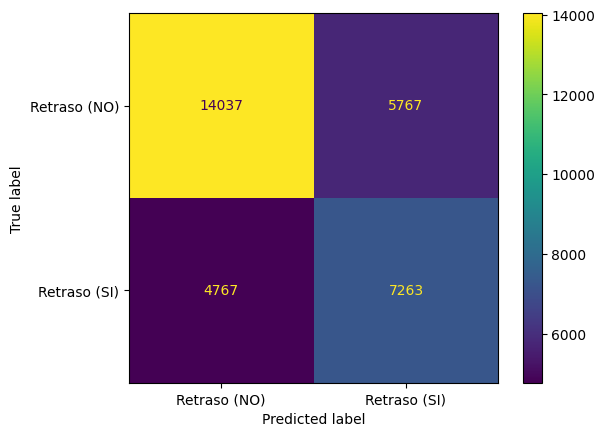

In [107]:
matrix = confusion_matrix(y_test, y_pred)
print(matrix)
visualizacion = ConfusionMatrixDisplay(matrix, display_labels=['Retraso (NO)', 'Retraso (SI)'])
visualizacion.plot()

                Feature  Importance
32       bloque_horario    0.199610
12         crs_dep_time    0.195775
1                 month    0.034228
4     op_unique_carrier    0.015606
3           day_of_week    0.011346
31         distancia_km    0.009575
18         crs_arr_time    0.008450
21     crs_elapsed_time    0.007721
2          day_of_month    0.005491
6                origin    0.005211
27  Temperature_Celsius    0.005042
9                  dest    0.004068
30        Visibility_km    0.003735
28     Wind_Speed_knots    0.003091
29     Turbulence_Level    0.001593


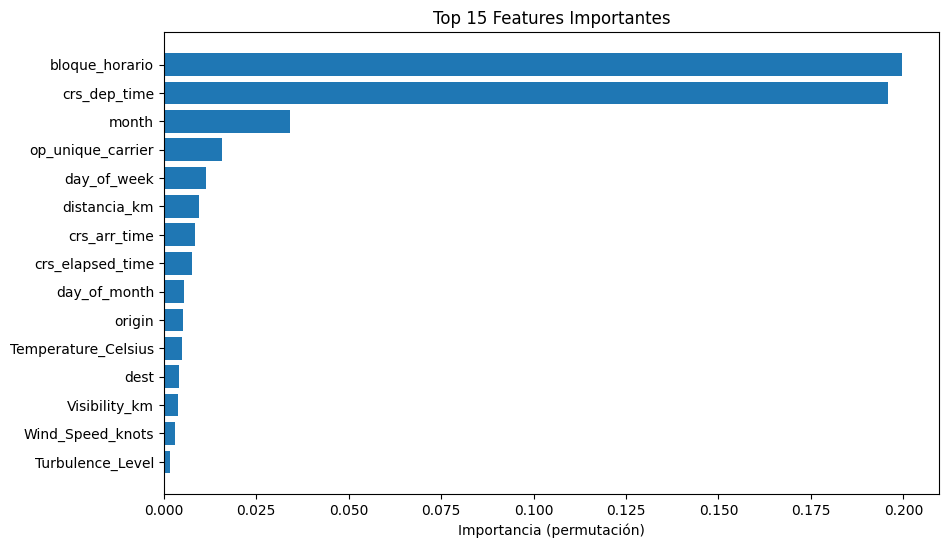

In [116]:
from sklearn.inspection import permutation_importance

result = permutation_importance(
    modelo_hist_target_clima,            
    X_test,           
    y_test,           
    n_repeats=10,     
    random_state=200, 
    n_jobs=-1         
)

importances = result.importances_mean
feature_names = X_train.columns


importance_df = pd.DataFrame({
    'Feature': feature_names,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

print(importance_df.head(15))  


plt.figure(figsize=(10, 6))
plt.barh(importance_df['Feature'].head(15), importance_df['Importance'].head(15))
plt.xlabel('Importancia (permutación)')
plt.title('Top 15 Features Importantes')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
variables_finales = [
    'bloque_horario', 'crs_dep_time', 'month', 'op_unique_carrier', 
    'day_of_week', 'distancia_km', 'crs_arr_time', 'crs_elapsed_time', 
    'day_of_month', 'origin', 'Temperature_Celsius', 'dest', 'Visibility_km'
]

X_test_reduced = X_test[variables_finales]


num_final = [v for v in variables_finales if v in variables_numericas_reales]
cat_final = [v for v in variables_finales if v in variables_categoricas_reales]


Preprocessor_final = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), num_final),
        ('cat', TargetEncoder(target_type='binary', random_state=200), cat_final)
    ]
)

modelo_hist_target_clima = Pipeline(steps=[
    ('preprocessor', Preprocessor_target),
    ('classifier', HistGradientBoostingClassifier(
        class_weight='balanced',
        random_state=200,
        learning_rate=0.03,
        max_iter=500,
        l2_regularization=1.5,
        max_depth=10,             
        max_leaf_nodes=31,        
        early_stopping=True,      
        validation_fraction=0.1,  
        n_iter_no_change=10
    ))
])


modelo_hist_target_clima.fit(X_train, y_train)

y_pred = modelo_hist_target_clima.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(f'predicción con los valores reales:\n {classification_report(y_test, y_pred)}')


Accuracy: 0.6690959351636615
predicción con los valores reales:
               precision    recall  f1-score   support

           0       0.75      0.71      0.73     19804
           1       0.56      0.60      0.58     12030

    accuracy                           0.67     31834
   macro avg       0.65      0.66      0.65     31834
weighted avg       0.68      0.67      0.67     31834



In [121]:

param_dist = {
    'classifier__learning_rate': [0.01, 0.03, 0.1],
    'classifier__max_iter': [300, 500, 700],
    'classifier__max_depth': [5, 10, 20, None],
    'classifier__l2_regularization': [0.1, 1.5, 5.0],
    'classifier__max_leaf_nodes': [15, 31, 63]
}

random_search = RandomizedSearchCV(
    modelo_hist_target_clima, 
    param_distributions=param_dist, 
    n_iter=10, 
    cv=3, 
    scoring='recall_macro', 
    random_state=200,
    n_jobs=-1 
)

random_search.fit(X_train, y_train)

print(f"Mejor score (recall) encontrado: {random_search.best_score_}")

print(f"Mejores parámetros: {random_search.best_params_}") 



Mejor score (recall) encontrado: 0.6568723013403469
Mejores parámetros: {'classifier__max_leaf_nodes': 63, 'classifier__max_iter': 700, 'classifier__max_depth': 10, 'classifier__learning_rate': 0.03, 'classifier__l2_regularization': 5.0}


In [122]:
y_pred = random_search.best_estimator_.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))

print(f'predicción con los valores reales:\n {classification_report(y_test, y_pred)}')

Accuracy: 0.6757554815605956
predicción con los valores reales:
               precision    recall  f1-score   support

           0       0.75      0.72      0.73     19804
           1       0.57      0.61      0.59     12030

    accuracy                           0.68     31834
   macro avg       0.66      0.66      0.66     31834
weighted avg       0.68      0.68      0.68     31834



Accuracy: 0.6757554815605956
predicción con los valores reales:
               precision    recall  f1-score   support

           0       0.75      0.72      0.73     19804
           1       0.57      0.61      0.59     12030

    accuracy                           0.68     31834
   macro avg       0.66      0.66      0.66     31834
weighted avg       0.68      0.68      0.68     31834

## Modelo logistico

In [45]:
scaler = StandardScaler(with_mean=False)

df_x_real = df[variables_numericas_reales + variables_categoricas_reales]

X_train, X_test, y_train, y_test = train_test_split(df_x_real, y, test_size=0.2, random_state=200)

variables_numericas_reales_se = selector(dtype_include=['int64', 'float64'])
variables_categoricas_reales_se = selector(dtype_include=['object', 'category'])

Preprocessor = ColumnTransformer(
    transformers=[
        ('num', scaler, variables_numericas_reales), 
        ('cat', OneHotEncoder(
            drop="if_binary", 
            handle_unknown="ignore", 
            sparse_output=True  
        ), variables_categoricas_reales)  
    ],
    remainder='drop',
    sparse_threshold=1.0  
)

modelo_logistico = Pipeline(steps=[
    ('preprocessor', Preprocessor), 
    ('classifier', LogisticRegression(
        random_state=200,
        class_weight='balanced',
        solver='saga',      
        max_iter=300,       
        n_jobs=-1,          
        warm_start=True     
    ))
])

modelo_logistico.fit(X_train, y_train)

y_pred = modelo_logistico.predict(X_test)



print("Accuracy:", accuracy_score(y_test, y_pred))

print(f'predicción antes de las mejoras:\n {classification_report(y_test, y_pred)}')

Accuracy: 0.6164764610704251
predicción antes de las mejoras:
               precision    recall  f1-score   support

           0       0.74      0.61      0.67    889169
           1       0.48      0.62      0.54    503885

    accuracy                           0.62   1393054
   macro avg       0.61      0.62      0.61   1393054
weighted avg       0.65      0.62      0.62   1393054



In [46]:
y_probs = modelo_logistico.predict_proba(X_test)[:, 1]
y_pred_ajustado = (y_probs > 0.53).astype(int) 

print("Accuracy ajustado:", accuracy_score(y_test, y_pred_ajustado))
print(classification_report(y_test, y_pred_ajustado))

Accuracy ajustado: 0.6374117586252938
              precision    recall  f1-score   support

           0       0.73      0.69      0.71    889169
           1       0.50      0.55      0.52    503885

    accuracy                           0.64   1393054
   macro avg       0.61      0.62      0.62   1393054
weighted avg       0.65      0.64      0.64   1393054



Accuracy ajustado: 0.6374117586252938
              precision    recall  f1-score   support

           0       0.73      0.69      0.71    889169
           1       0.50      0.55      0.52    503885

    accuracy                           0.64   1393054
   macro avg       0.61      0.62      0.62   1393054
weighted avg       0.65      0.64      0.64   1393054


Se guarda el mejor modelo

In [88]:
import joblib

In [ ]:

joblib.dump(modelo_hist_target, 'champiom.joblib', compress=3)

['champiom.joblib']

Se guarda el modelo con funcioanlidad extra

In [123]:
joblib.dump(random_search.best_estimator_, 'champion_clima.joblib', compress=3)

['champion_clima.joblib']

In [ ]:
"""
dic_modelos = {
    'modelo_bosque_retraso': model_bosque,
    'modelo_bosque_cancelacion': modelo_bosque_cancelado
}
"""

In [ ]:
"""
import joblib

# Cargar el modelo desde el archivo
joblib.dump(model_bosque, 'modelo_random_pre_forest_v1.joblib', compress=3)

# Guardar el diccionario de modelos
joblib.dump(dic_modelos, 'dict_models_v1.joblib', compress=3)   
"""


['modelo_random_pre_forest_v1.joblib']